In [3]:
#linear regression model using least square method
%matplotlib inline 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20.0,10.0)
#reading data
data=pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
#collecting data [input/output]
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [7]:
#now calculating the value of m and c from the equation y=mx+c
x_mean=np.mean(X)
y_mean=np.mean(Y)
# total number of values
n=len(X)
#using the formula calculating the value of m and c
num=0
den=0
for i in range(n):
    num+=(X[i]-x_mean)*(Y[i]-y_mean)
    den+=(X[i]-x_mean)**2
    
b1=num/den
b0=y_mean-(b1*x_mean)
print(b1,b0)


0.26342933948939945 325.57342104944223


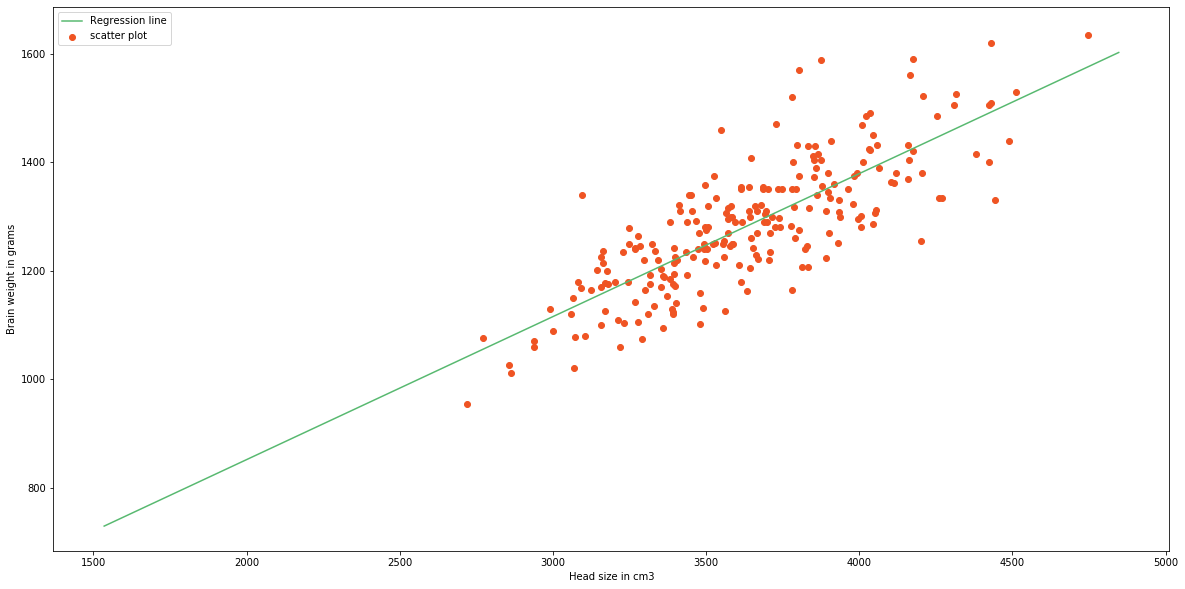

In [9]:
#plotting the values and regression line 
max_x=np.max(X)+100
min_x=np.max(Y)-100
#calculating the line values of x and y
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x
#plotting line 
plt.plot(x,y,color='#58b970',label='Regression line')
#plotting scatter point
plt.scatter(X,Y,c='#ef5423',label='scatter plot')
plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [10]:
#calculating the goodness of the model
ss_t=0
ss_r=0
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t+=(Y[i]-y_mean)**2
    ss_r+=(Y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)
    

0.6393117199570003


In [13]:
#now using the sklearn method
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#cannot use the rank one matrix in sklearn
X=X.reshape(n,1)
#creating model
reg=LinearRegression()
#fitting training data
reg=reg.fit(X,Y)
#y prediction
Y_pred=reg.predict(X)
#calculating R2 score
r2_score=reg.score(X,Y)
print(r2_score)

0.639311719957
